In [ ]:
!pip install PyPDF2
import pandas as pd
import seaborn as sns
import numpy as np
from PyPDF2 import PdfWriter, PdfReader
import re
import codecs
import copy
import collections
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from __future__ import division
import matplotlib

%matplotlib inline
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk.corpus
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install pdfrw
from pdfrw import PdfReader, PdfWriter

input_file = "b.pdf"
output_file = "bible13.pdf"

# Define the reader and writer objects
reader_input = PdfReader(input_file)
writer_output = PdfWriter()

# Go through the pages one after the next
for current_page in range(len(reader_input.pages)):
    if current_page > 1:
        writer_output.addpage(reader_input.pages[current_page])
        print("adding page %i" % (current_page + 9))

# Write the modified content to disk
writer_output.write(output_file)


In [ ]:
!pip install PyPDF2
import PyPDF2
pdfFileObject = open('bible1.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObject)
count = pdfReader.numPages
output = ""
for i in range(pdfReader.numPages):
    pageObj = pdfReader.getPage(i)
    output += pageObj.extractText()
output

In [ ]:
len(output)

442628

In [ ]:
#remove punctuations
import string

output=output.translate(str.maketrans('','', string.punctuation))


In [ ]:
#tokenize


#removing stopwords 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")

output = [word for word in output if word not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop=['thy','thou','thee','I',]

output=[word for word in text if not word in stop]

In [ ]:
len(output)

442628

In [ ]:

from nltk.probability import FreqDist
fr=FreqDist(output)
fr.most_common(15)

In [ ]:
df= pd.DataFrame(fr.most_common(15),
                             columns=['words', 'count'])
df.head()

,words,count
0,shall,11130
1,Lord,7854
2,God,4725
3,said,3915
4,hath,3148


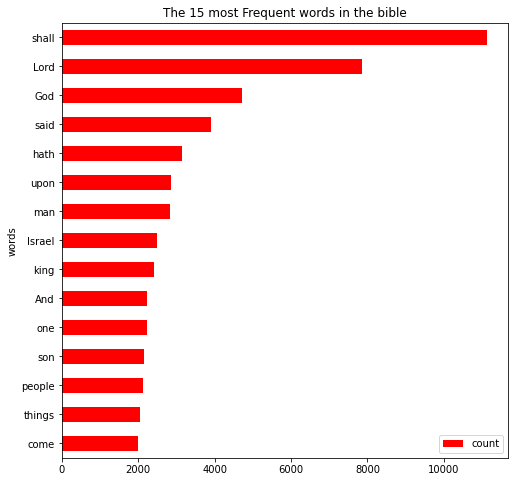

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("The 15 most Frequent words in the bible")

plt.show()